# Semana 2: Reproducción del baseline

## 2. Extracción de características (HRV, estadísticas)

In [10]:
# obtener datos de ecg_rr_features_extracted.csv
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Configuración de la ruta del directorio
current_dir = os.getcwd()
# Ruta al archivo CSV
csv_file = os.path.join(current_dir, 'ecg_rr_features_extracted.csv')
# Cargar el archivo CSV
df = pd.read_csv(csv_file)
# Ver datos del DataFrame
print("Datos del DataFrame:")
print(df.head())
# cantidad de filas y columnas
print("\nCantidad de filas y columnas:")    
print(df.shape)

Datos del DataFrame:
      mean_rr      std_rr   skew_rr    kurt_rr label
0  761.666667   33.093435  0.133439   1.811500     N
1  867.575758  251.388431 -1.267438   2.884663     N
2  731.434599   79.934367 -2.918037  14.419521     N
3  947.111111  178.938709  0.482376   2.062416     A
4  542.324159  223.975072  1.170247   2.981416     A

Cantidad de filas y columnas:
(100, 5)


## Quitar datos innecesarios

In [11]:
# Ver los tipos de labels 
print("\nTipos de labels:")
print(df['label'].unique())


Tipos de labels:
['N' 'A' 'O' '~']


In [15]:
# mantener sólo labels de tipo 'N' y 'A'
df = df[df['label'].isin(['N', 'A'])]
print("\nDatos del DataFrame filtrados:")
print(df.head())
print("\n labels únicos después del filtrado:")
print(df['label'].unique())


Datos del DataFrame filtrados:
      mean_rr      std_rr   skew_rr    kurt_rr label
0  761.666667   33.093435  0.133439   1.811500     N
1  867.575758  251.388431 -1.267438   2.884663     N
2  731.434599   79.934367 -2.918037  14.419521     N
3  947.111111  178.938709  0.482376   2.062416     A
4  542.324159  223.975072  1.170247   2.981416     A

 labels únicos después del filtrado:
['N' 'A']


## 3. Entrenamiento del modelo baseline (Random Forest)


Características más importantes:
   feature  importance
0  mean_rr    0.355163
1   std_rr    0.263839
2  skew_rr    0.209337
3  kurt_rr    0.171661


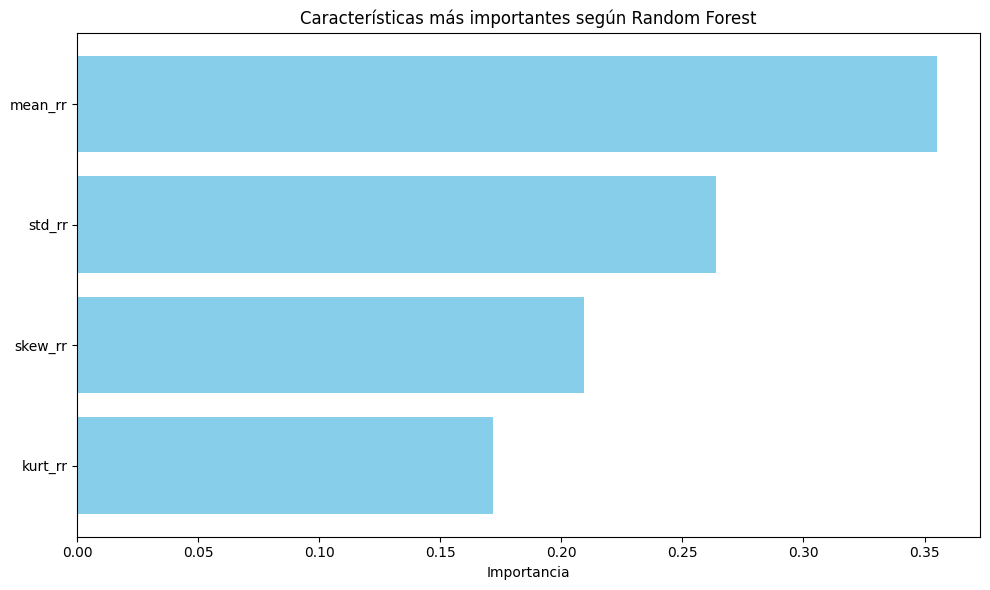

In [17]:
# aplicar random forest para obtener las características más importantes
from sklearn.ensemble import RandomForestClassifier
# Separar características y etiquetas
X = df.drop(columns=['label'])
y = df['label']
# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo
rf.fit(X, y)
# Obtener la importancia de las características
importances = rf.feature_importances_
# Crear un DataFrame para las importancias
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
# Ordenar las importancias de mayor a menor
importance_df = importance_df.sort_values(by='importance', ascending=False)
# Mostrar las características más importantes
print("\nCaracterísticas más importantes:")
print(importance_df.head(10))
# Graficar las importancias
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.title('Características más importantes según Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la más importante en la parte superior
plt.tight_layout()
plt.show()


## 4. Evaluación simple (train/test o validación cruzada)

In [19]:
# evaluacion simple (train/test o validación cruzada)
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)
# Evaluar el modelo con los datos de prueba
accuracy = rf.score(X_test, y_test)
print(f"\nPrecisión del modelo en el conjunto de prueba: {accuracy:.2f}")
# Guardar el DataFrame de importancias en un archivo CSV
importance_csv_file = os.path.join(current_dir, 'feature_importances.csv')
importance_df.to_csv(importance_csv_file, index=False)
print(f"\nImportancias de las características guardadas en: {importance_csv_file}")


Precisión del modelo en el conjunto de prueba: 0.93

Importancias de las características guardadas en: f:\repoPart6\proyectoML\feature_importances.csv
